<a href="https://colab.research.google.com/github/CaioPassos3/AprendizagemDeMaquina/blob/main/Lista1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm_notebook as tqdm
from typing import List, Tuple, Callable
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Questão 1.

Considere o conjunto de dados disponível em artificial1d.csv organizado em
duas colunas, x e y. Seja um modelo de regressão linear para ˆy = f(x).

a) Apresente os parâmetros do modelo e o MSE (erro quadrático médio)
obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote
a reta resultante sobre os dados.

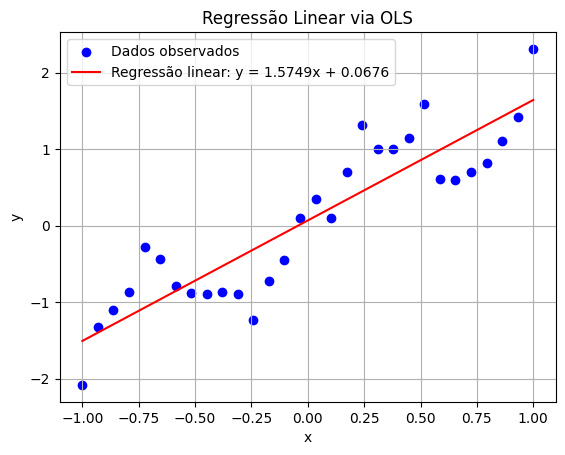

Parâmetros do modelo:
Intercept (β0): 0.067618
Slope (β1): 1.574865
MSE: 0.213401


In [27]:
# Carregando os dados
data = np.loadtxt('artificial1d.csv', delimiter=',')
x = data[:, 0]
y = data[:, 1]

# Adicionando coluna para o termo de interceptação
X = np.column_stack([np.ones_like(x), x])

# Calculando os parâmetros usando OLS
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Extraindo os coeficientes
intercept, slope = beta

# Prevendo os valores de y
y_pred = X @ beta

# Calculando o MSE
mse = np.mean((y - y_pred) ** 2)

# Plotando os dados e a reta de regressão
plt.scatter(x, y, label='Dados observados', color='blue')
plt.plot(x, y_pred, label=f'Regressão linear: y = {slope:.4f}x + {intercept:.4f}', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear via OLS')
plt.legend()
plt.grid(True)
plt.show()

# Imprimindo os resultados
print("Parâmetros do modelo:")
print(f"Intercept (β0): {intercept:.6f}")
print(f"Slope (β1): {slope:.6f}")
print(f"MSE: {mse:.6f}")

b) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem
obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante
sobre os dados.

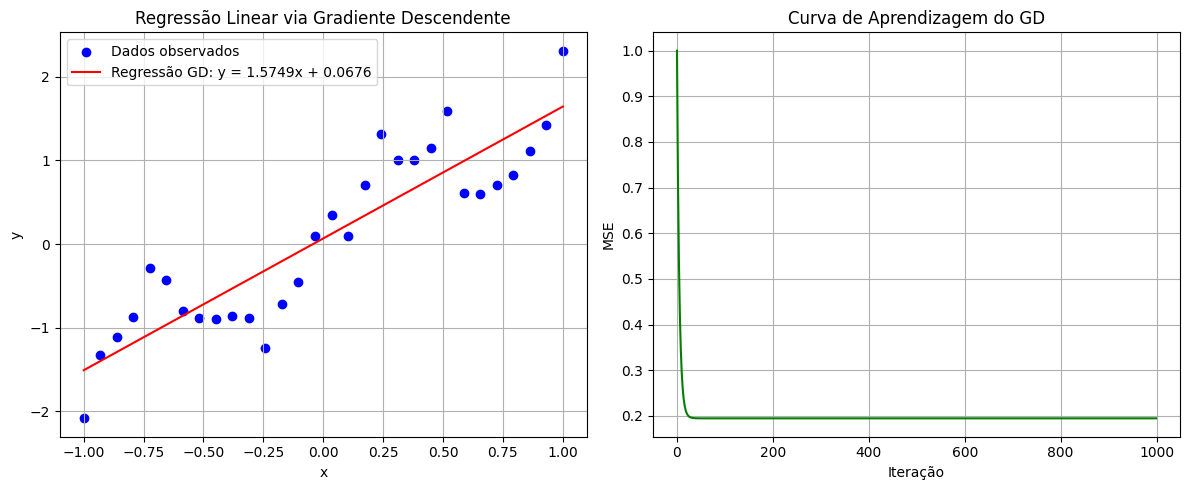

Parâmetros do modelo (GD):
Intercept (β0): 0.067618
Slope (β1): 1.574865
MSE final: 0.213401


In [28]:
# Carregando os dados
data = np.loadtxt('artificial1d.csv', delimiter=',')
x = data[:, 0]
y = data[:, 1]

# Normalizando os dados para melhor convergência do GD
x_normalized = (x - np.mean(x)) / np.std(x)
y_normalized = (y - np.mean(y)) / np.std(y)

# Hiperparâmetros do GD
learning_rate = 0.1
num_iterations = 1000

# Inicializando parâmetros (β0 e β1)
beta = np.zeros(2)

# Armazenando o histórico do custo (MSE)
cost_history = []

# Gradiente Descendente
for _ in range(num_iterations):
    # Predição (ŷ = β0 + β1*x)
    y_pred = beta[0] + beta[1] * x_normalized

    # Calculando o erro (MSE)
    error = y_pred - y_normalized
    mse = np.mean(error ** 2)
    cost_history.append(mse)

    # Gradientes (derivadas parciais)
    grad_beta0 = np.mean(error)
    grad_beta1 = np.mean(error * x_normalized)

    # Atualizando os parâmetros
    beta[0] -= learning_rate * grad_beta0
    beta[1] -= learning_rate * grad_beta1

# Desnormalizando os parâmetros para a escala original
beta[1] = beta[1] * (np.std(y) / np.std(x))
beta[0] = np.mean(y) - beta[1] * np.mean(x)

# Calculando y_pred final com os parâmetros desnormalizados
y_pred_final = beta[0] + beta[1] * x

# MSE final
mse_final = np.mean((y - y_pred_final) ** 2)

# Plotando os dados e a reta de regressão
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, label='Dados observados', color='blue')
plt.plot(x, y_pred_final, label=f'Regressão GD: y = {beta[1]:.4f}x + {beta[0]:.4f}', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear via Gradiente Descendente')
plt.legend()
plt.grid(True)

# Plotando a curva de aprendizagem (MSE vs. iteração)
plt.subplot(1, 2, 2)
plt.plot(range(num_iterations), cost_history, color='green')
plt.xlabel('Iteração')
plt.ylabel('MSE')
plt.title('Curva de Aprendizagem do GD')
plt.grid(True)

plt.tight_layout()
plt.show()

# Resultados
print("Parâmetros do modelo (GD):")
print(f"Intercept (β0): {beta[0]:.6f}")
print(f"Slope (β1): {beta[1]:.6f}")
print(f"MSE final: {mse_final:.6f}")

c) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem
obtidos pelo algoritmo SGD (gradiente descendente estocástico).
Plote a reta resultante sobre os dados.

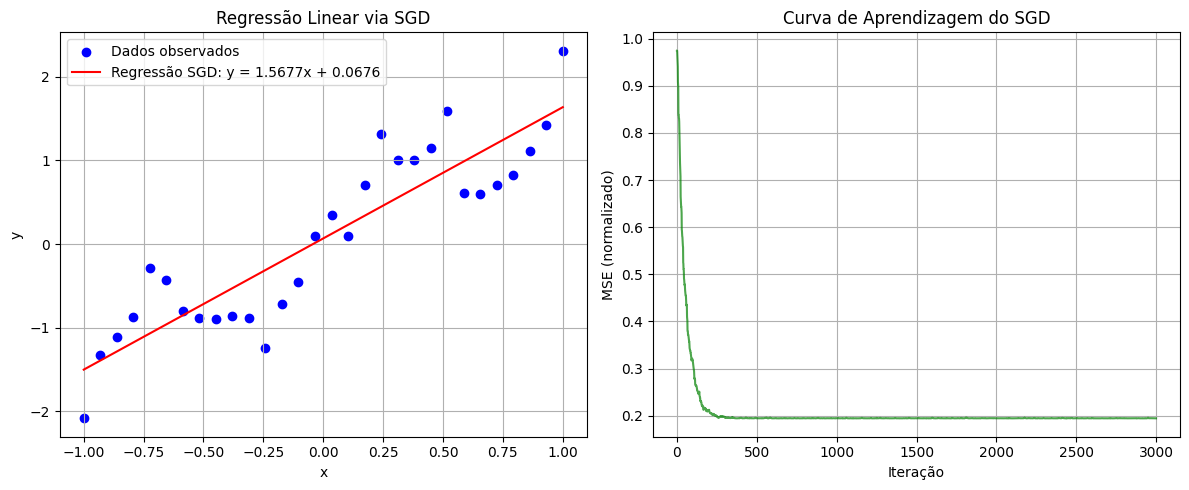

Parâmetros do modelo (SGD):
Intercept (β0): 0.067618
Slope (β1): 1.567712
MSE final: 0.213419


In [29]:
# Carregando os dados
data = np.loadtxt('artificial1d.csv', delimiter=',')
x = data[:, 0]
y = data[:, 1]

# Normalizando os dados para melhor convergência do SGD
x_mean, x_std = np.mean(x), np.std(x)
y_mean, y_std = np.mean(y), np.std(y)
x_normalized = (x - x_mean) / x_std
y_normalized = (y - y_mean) / y_std

# Hiperparâmetros do SGD
learning_rate = 0.01
num_epochs = 100
batch_size = 1  # SGD usa batch_size=1 (amostra única por iteração)

# Inicializando parâmetros (β0 e β1)
beta = np.zeros(2)

# Armazenando histórico do custo (MSE)
cost_history = []

# SGD
np.random.seed(42)  # Para reprodutibilidade
n_samples = len(x)

for epoch in range(num_epochs):
    # Embaralhando os dados a cada época
    indices = np.random.permutation(n_samples)
    x_shuffled = x_normalized[indices]
    y_shuffled = y_normalized[indices]

    for i in range(n_samples):
        # Selecionando uma amostra aleatória (SGD)
        xi = x_shuffled[i]
        yi = y_shuffled[i]

        # Predição (ŷ = β0 + β1*x)
        y_pred = beta[0] + beta[1] * xi

        # Gradientes (derivadas parciais para uma amostra)
        error = y_pred - yi
        grad_beta0 = error
        grad_beta1 = error * xi

        # Atualizando os parâmetros
        beta[0] -= learning_rate * grad_beta0
        beta[1] -= learning_rate * grad_beta1

        # Calculando MSE atual
        y_pred_all = beta[0] + beta[1] * x_normalized
        mse = np.mean((y_pred_all - y_normalized) ** 2)
        cost_history.append(mse)

# Desnormalizando os parâmetros para a escala original
beta[1] = beta[1] * (y_std / x_std)
beta[0] = y_mean - beta[1] * x_mean

# Calculando y_pred final com os parâmetros desnormalizados
y_pred_final = beta[0] + beta[1] * x

# MSE final
mse_final = np.mean((y - y_pred_final) ** 2)

# Plotando os dados e a reta de regressão
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, label='Dados observados', color='blue')
plt.plot(x, y_pred_final, label=f'Regressão SGD: y = {beta[1]:.4f}x + {beta[0]:.4f}', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear via SGD')
plt.legend()
plt.grid(True)

# Plotando a curva de aprendizagem (MSE vs. iteração)
plt.subplot(1, 2, 2)
plt.plot(cost_history, color='green', alpha=0.7)
plt.xlabel('Iteração')
plt.ylabel('MSE (normalizado)')
plt.title('Curva de Aprendizagem do SGD')
plt.grid(True)

plt.tight_layout()
plt.show()

# Resultados
print("Parâmetros do modelo (SGD):")
print(f"Intercept (β0): {beta[0]:.6f}")
print(f"Slope (β1): {beta[1]:.6f}")
print(f"MSE final: {mse_final:.6f}")

Questão 2.

Considere o conjunto de dados disponível em california.csv, organizado em 9
colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída.
Os 8 atributos são usados na predição da mediana de preços de casas em distritos
da Califórnia na década de 1990. Maiores detalhes sobre os dados podem
ser conferidos em https://scikit-learn.org/stable/datasets/real_
world.html#california-housing-dataset.

a) Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%).

In [30]:
# Carregando os dados
data = pd.read_csv("california.csv")

# Separando atributos (X) e saída (y)
X = data.iloc[:, :-1].values  # Todas as colunas, exceto a última
y = data.iloc[:, -1].values   # Apenas a última coluna

# Embaralhando os dados
indices = np.arange(X.shape[0])
np.random.seed(42)  # Para reprodutibilidade
np.random.shuffle(indices)

# Aplicando os índices embaralhados aos dados
X_shuffled = X[indices]
y_shuffled = y[indices]

# Definindo o ponto de corte para 80%
split_index = int(0.8 * X.shape[0])

# Dividindo os dados em treino e teste
X_train = X_shuffled[:split_index]
y_train = y_shuffled[:split_index]
X_test = X_shuffled[split_index:]
y_test = y_shuffled[split_index:]

# Exibindo as dimensões dos conjuntos
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (799, 8)
y_train: (799,)
X_test: (200, 8)
y_test: (200,)


b) Treine 13 modelos de regressão polinomial, com ordens de 1 a 13. Você
pode usar o algoritmo OLS.

In [31]:
def regressao_polinomial(X: np.ndarray, y: np.ndarray, grau: int = 1, algoritmo: str = 'OLS',
                         alpha: float=0.01, epochs: int=1000) -> Tuple[np.ndarray, float]:

    concatena: Callable = np.column_stack
    new_X = X.copy()  # Cria uma cópia de X.
    # Concatena as potências de X.
    for i in range(2, grau+1):
        new_X = concatena((new_X, X**i))
    # Em cada caso, recebe o vetor de pesos e o eqm e calcula o RMSE.
    # No caso do GD e GDE, é necessário acessar o último eqm.
    if algoritmo == 'OLS':
        w, eqm = regressao_linear_ols(new_X, y)
        return w, eqm**0.5
    elif algoritmo == 'GD':
        w, eqms = regressao_linear_gd(new_X, y, alpha, epochs)
        return w, (eqms[-1])**0.5
    elif algoritmo == 'GDE':
        w, eqms = regressao_linear_gde(new_X, y, alpha, epochs)
        return w, (eqms[-1])**0.5
    else:
        raise ValueError(f'Algoritmo [{algoritmo}] não implementado.')

In [32]:
def regressao_linear_ols(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, float]:

    # Está sendo utilizada a pseudoinversa para contornar casos onde X não é invertível.
    pseudoinversa: Callable = np.linalg.pinv
    # Cálculo dos pesos.
    w: np.ndarray = pseudoinversa(X.T @ X) @ X.T @ y
    y_pred: np.ndarray = X @ w  # Cálculo de y predito.
    e: np.ndarray = y - y_pred  # Cálculo do erro.
    # Cálculo do erro quadrático médio.
    eqm: float = np.mean(e**2)
    return w, eqm

In [33]:
algoritmo = 'OLS'
graus = 13
ws: List[np.array] = []  # Lista de arrays de pesos.
rmses_train: List[List[float]|float] = []  # Lista dos eqm.
for grau in tqdm(range(1, graus+1)):
    w, rmse = regressao_polinomial(X_train, y_train, grau, algoritmo)
    ws.append(w)
    rmses_train.append(rmse)

  0%|          | 0/13 [00:00<?, ?it/s]

c) Reporte o RMSE (raiz quadrada do erro quadrático médio) no treinamento
e no teste para cada modelo. Faça um gráfico para o treino e um gráfico
para o teste.

In [34]:
graus = list(range(1, 14))
# Criando um DataFrame com os resultados de RMSE para treino e teste
rmse_df = pd.DataFrame({
    "Grau do Polinômio": list(graus),
    "RMSE Treinamento": rmses_train,
    "RMSE Teste": rmses_test
})

rmse_df

,Grau do Polinômio,RMSE Treinamento,RMSE Teste
0,1,0.710000,0.739221
1,2,0.727314,0.722604
2,3,1.134754,0.690472
3,4,2.390487,0.855884
4,5,2.403530,1.070079
5,6,2.405625,0.872310
6,7,2.406180,1.457250
7,8,2.406371,6.458169
8,9,2.406446,4.675290
9,10,2.406477,1.905470


  0%|          | 0/13 [00:00<?, ?it/s]

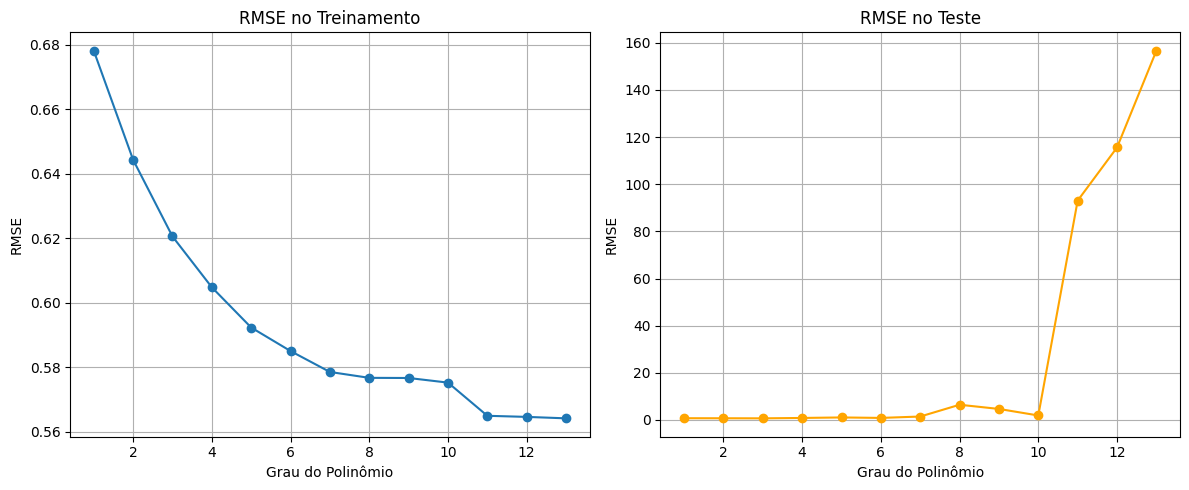

In [35]:
# Carregar os dados
data = pd.read_csv("california.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Embaralhar os dados
indices = np.arange(X.shape[0])
np.random.seed(42)
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Dividir em treino e teste
split_index = int(0.8 * X.shape[0])
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

# Normalizar os dados
scaler_X = MinMaxScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# Funções auxiliares
def regressao_linear_ols(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, float]:
    w = np.linalg.pinv(X.T @ X) @ X.T @ y
    y_pred = X @ w
    e = y - y_pred
    eqm = np.mean(e**2)
    return w, eqm

def regressao_polinomial(X: np.ndarray, y: np.ndarray, grau: int = 1) -> Tuple[np.ndarray, float]:
    new_X = X.copy()
    for i in range(2, grau+1):
        new_X = np.column_stack((new_X, X**i))
    w, eqm = regressao_linear_ols(new_X, y)
    return w, eqm**0.5  # Retorna RMSE

# Avaliação nos modelos de grau 1 a 13
graus = range(1, 14)
rmses_train = []
rmses_test = []

for grau in tqdm(graus):
    # Treinar modelo
    w, _ = regressao_polinomial(X_train_scaled, y_train_scaled, grau)

    # Preparar dados polinomiais
    new_X_train = X_train_scaled.copy()
    new_X_test = X_test_scaled.copy()
    for i in range(2, grau+1):
        new_X_train = np.column_stack((new_X_train, X_train_scaled**i))
        new_X_test = np.column_stack((new_X_test, X_test_scaled**i))

    # Previsões e "desnormalizar" saída
    y_pred_train = new_X_train @ w
    y_pred_test = new_X_test @ w
    y_pred_train_orig = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).ravel()
    y_pred_test_orig = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).ravel()

    # RMSE com os valores originais
    rmse_train = np.sqrt(np.mean((y_train - y_pred_train_orig) ** 2))
    rmse_test = np.sqrt(np.mean((y_test - y_pred_test_orig) ** 2))

    rmses_train.append(rmse_train)
    rmses_test.append(rmse_test)

# Gráficos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(graus, rmses_train, marker='o', label='Treinamento')
plt.title("RMSE no Treinamento")
plt.xlabel("Grau do Polinômio")
plt.ylabel("RMSE")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(graus, rmses_test, marker='o', color='orange', label='Teste')
plt.title("RMSE no Teste")
plt.xlabel("Grau do Polinômio")
plt.ylabel("RMSE")
plt.grid(True)

plt.tight_layout()
plt.show()

d) Repita os 2 itens anteriores incluindo um termo de regularização L2
(por exemplo, com fator λ = 0.01).

Treine 13 modelos de regressão polinomial, com ordens de 1 a 13. Você
pode usar o algoritmo OLS.

In [36]:
def regressao_linear_ols(X: np.ndarray, y: np.ndarray, l2_lambda: float = 0.01) -> Tuple[np.ndarray, float]:
    I = np.eye(X.shape[1])
    w = np.linalg.pinv(X.T @ X + l2_lambda * I) @ X.T @ y
    y_pred = X @ w
    e = y - y_pred
    eqm = np.mean(e ** 2)
    return w, eqm

def regressao_polinomial(X: np.ndarray, y: np.ndarray, grau: int = 1, algoritmo: str = 'OLS',
                         alpha: float = 0.01, epochs: int = 1000, l2_lambda: float = 0.01) -> Tuple[np.ndarray, float]:

    new_X = X.copy()
    for i in range(2, grau + 1):
        new_X = np.column_stack((new_X, X ** i))

    if algoritmo == 'OLS':
        w, eqm = regressao_linear_ols(new_X, y, l2_lambda)
        return w, eqm ** 0.5  # RMSE
    elif algoritmo == 'GD':
        w, eqms = regressao_linear_gd(new_X, y, alpha, epochs)
        return w, (eqms[-1]) ** 0.5
    elif algoritmo == 'GDE':
        w, eqms = regressao_linear_gde(new_X, y, alpha, epochs)
        return w, (eqms[-1]) ** 0.5
    else:
        raise ValueError(f'Algoritmo [{algoritmo}] não implementado.')

# Avaliando modelos com regularização L2
graus = list(range(1, 14))  # Graus de 1 a 13
rmses_train_l2 = []
rmses_test_l2 = []

for grau in tqdm(graus):
    # Gerar polinômios
    X_train_poly = X_train_scaled.copy()
    X_test_poly = X_test_scaled.copy()
    for i in range(2, grau+1):
        X_train_poly = np.column_stack((X_train_poly, X_train_scaled**i))
        X_test_poly = np.column_stack((X_test_poly, X_test_scaled**i))

    # Treinar com L2
    w, _ = regressao_linear_ols(X_train_poly, y_train_scaled, l2_lambda=0.01)

    # Previsões
    y_pred_train = X_train_poly @ w
    y_pred_test = X_test_poly @ w

    # Desnormalizar
    y_pred_train_orig = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).ravel()
    y_pred_test_orig = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).ravel()

    # RMSE
    rmse_train = np.sqrt(np.mean((y_train - y_pred_train_orig) ** 2))
    rmse_test = np.sqrt(np.mean((y_test - y_pred_test_orig) ** 2))

    rmses_train_l2.append(rmse_train)
    rmses_test_l2.append(rmse_test)

# Mostrar os resultados
print("Resultados com Regularização L2 (λ=0.01):")
print(f"{'Grau':>5} {'RMSE Treino':>15} {'RMSE Teste':>15}")
for grau, rmse_tr, rmse_te in zip(graus, rmses_train_l2, rmses_test_l2):
    print(f"{grau:>5} {rmse_tr:>15.4f} {rmse_te:>15.4f}")

  0%|          | 0/13 [00:00<?, ?it/s]

Resultados com Regularização L2 (λ=0.01):
 Grau     RMSE Treino      RMSE Teste
    1          0.6781          0.7400
    2          0.6448          0.7205
    3          0.6284          0.7064
    4          0.6267          0.7026
    5          0.6253          0.6985
    6          0.6244          0.6965
    7          0.6236          0.6962
    8          0.6226          0.6964
    9          0.6213          0.6967
   10          0.6200          0.6968
   11          0.6189          0.6967
   12          0.6181          0.6966
   13          0.6175          0.6963


Reporte o RMSE (raiz quadrada do erro quadrático médio) no treinamento
e no teste para cada modelo. Faça um gráfico para o treino e um gráfico
para o teste.

In [37]:
# Reescrevendo os códigos com L2 (Ridge) regularização (lambda = 0.01)

lambda_l2 = 0.01  # Fator de regularização

# --- MODIFICADO DO SEU CÓDIGO: regressao_linear_ols com L2 ---
def regressao_linear_ols_l2(X: np.ndarray, y: np.ndarray, l2_lambda: float = 0.01) -> Tuple[np.ndarray, float]:
    n_features = X.shape[1]
    I = np.eye(n_features)
    w = np.linalg.pinv(X.T @ X + l2_lambda * I) @ X.T @ y
    y_pred = X @ w
    e = y - y_pred
    eqm = np.mean(e ** 2)
    return w, eqm

# --- MODIFICADO DO SEU CÓDIGO: regressao_polinomial com suporte a L2 ---
def regressao_polinomial_l2(X: np.ndarray, y: np.ndarray, grau: int = 1, l2_lambda: float = 0.01) -> Tuple[np.ndarray, float]:
    new_X = X.copy()
    for i in range(2, grau+1):
        new_X = np.column_stack((new_X, X**i))
    w, eqm = regressao_linear_ols_l2(new_X, y, l2_lambda)
    return w, eqm**0.5  # Retorna RMSE

# --- MODIFICADO DO MEU CÓDIGO: treino e avaliação com L2 ---
rmses_train_l2 = []
rmses_test_l2 = []

for grau in tqdm(graus):
    # Treinar modelo com L2
    w, _ = regressao_polinomial_l2(X_train_scaled, y_train_scaled, grau, lambda_l2)

    # Gerar dados polinomiais
    new_X_train = X_train_scaled.copy()
    new_X_test = X_test_scaled.copy()
    for i in range(2, grau+1):
        new_X_train = np.column_stack((new_X_train, X_train_scaled**i))
        new_X_test = np.column_stack((new_X_test, X_test_scaled**i))

    # Previsões e desnormalização
    y_pred_train = new_X_train @ w
    y_pred_test = new_X_test @ w
    y_pred_train_orig = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).ravel()
    y_pred_test_orig = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).ravel()

    # RMSE
    rmse_train = np.sqrt(np.mean((y_train - y_pred_train_orig) ** 2))
    rmse_test = np.sqrt(np.mean((y_test - y_pred_test_orig) ** 2))

    rmses_train_l2.append(rmse_train)
    rmses_test_l2.append(rmse_test)

# Exibir resultados com regularização
rmse_l2_df = pd.DataFrame({
    "Grau do Polinômio": list(graus),
    "RMSE Treinamento (L2)": rmses_train_l2,
    "RMSE Teste (L2)": rmses_test_l2
})

rmse_l2_df

  0%|          | 0/13 [00:00<?, ?it/s]

,Grau do Polinômio,RMSE Treinamento (L2),RMSE Teste (L2)
0,1,0.678149,0.740042
1,2,0.644813,0.720517
2,3,0.628430,0.706449
3,4,0.626655,0.702605
4,5,0.625283,0.698504
5,6,0.624440,0.696508
6,7,0.623636,0.696172
7,8,0.622555,0.696436
8,9,0.621268,0.696710
9,10,0.620002,0.696812


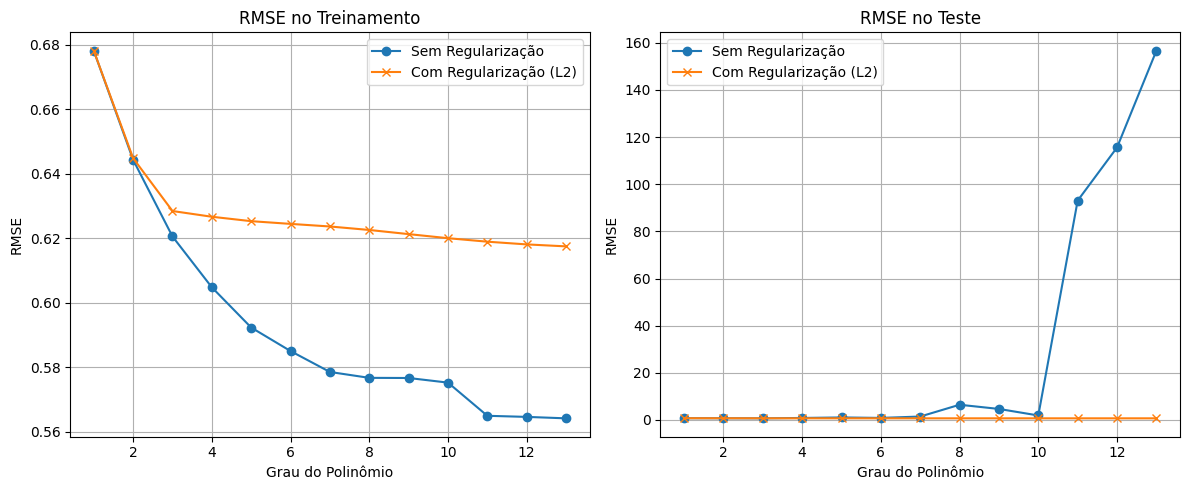

In [38]:

# Gráfico de RMSE no treinamento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(graus, rmses_train, marker='o', label='Sem Regularização')
plt.plot(graus, rmses_train_l2, marker='x', label='Com Regularização (L2)')
plt.title('RMSE no Treinamento')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

# Gráfico de RMSE no teste
plt.subplot(1, 2, 2)
plt.plot(graus, rmses_test, marker='o', label='Sem Regularização')
plt.plot(graus, rmses_test_l2, marker='x', label='Com Regularização (L2)')
plt.title('RMSE no Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()